Basic steps we needs to follow here to do audio classification

1) Read the dataset and understand and explore it
2) Data audio preprocessing i.e Taking out independent and dependent features
3) Need to divide these features in training and testing set
4) Apply ML algo and get the classification result

In [83]:
!pip install librosa 
!pip install IPython
!pip install streamlit

  Using cached streamlit-1.25.0-py2.py3-none-any.whl (8.1 MB)
  Using cached GitPython-3.1.32-py3-none-any.whl (188 kB)
  Using cached rich-13.4.2-py3-none-any.whl (239 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached tzlocal-4.3.1-py3-none-any.whl (20 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached altair-5.0.1-py3-none-any.whl (471 kB)
     ---------------------------------------- 21.5/21.5 MB 5.9 MB/s eta 0:00:00
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz_deprecation_shim-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import IPython.display as ipd
import librosa.display

In [3]:
file_path='UrbanSound8K/audio/fold2/100652-3-0-1.wav'
sample_path=r'E:\Personal_use\Personal_Projects\Audio_Classification\UrbanSound8K\audio\fold5\100263-2-0-3.wav'

In [4]:
sample_sound,sr=librosa.load(sample_path)

In [5]:
sample_sound

array([ 0.00331575,  0.00467553,  0.00361099, ..., -0.00376796,
       -0.00347471, -0.00357828], dtype=float32)

In [6]:
len(sample_sound)

88200

Display the sample audio file

4.0


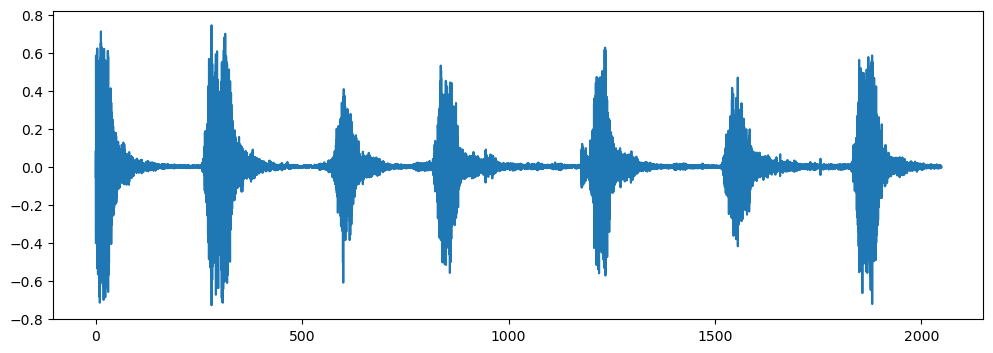

In [7]:
#Displaying the waveform
plt.figure(figsize=(12,4))
data,sr=librosa.load(file_path)
duration = librosa.get_duration(y=data)
time=librosa.times_like(data,sr=sr)
plt.plot(time,data)
ipd.Audio(file_path)
print(duration)

In [8]:
librosa.__version__

'0.10.0.post2'

In [9]:
metadata=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
duration=len(data)/sr

In [11]:
time = np.linspace(0, duration, len(data))
print(time)

[0.00000000e+00 4.53519881e-05 9.07039762e-05 ... 3.99990930e+00
 3.99995465e+00 4.00000000e+00]


In [12]:
len(time)

88200

In [13]:
sr

22050

In [14]:
sr*4

88200

In [15]:
#creation of spectrogram 
spectrogram=librosa.amplitude_to_db(np.abs(librosa.stft(data)),ref=np.max)

In [16]:
print(spectrogram)
len(spectrogram[0])

[[-80.       -42.258484 -38.893585 ... -63.317398 -57.348408 -64.215256]
 [-49.584892 -42.411022 -41.5954   ... -57.11496  -59.959595 -69.726494]
 [-46.07767  -48.99219  -49.605503 ... -60.713947 -65.89034  -66.83422 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


173

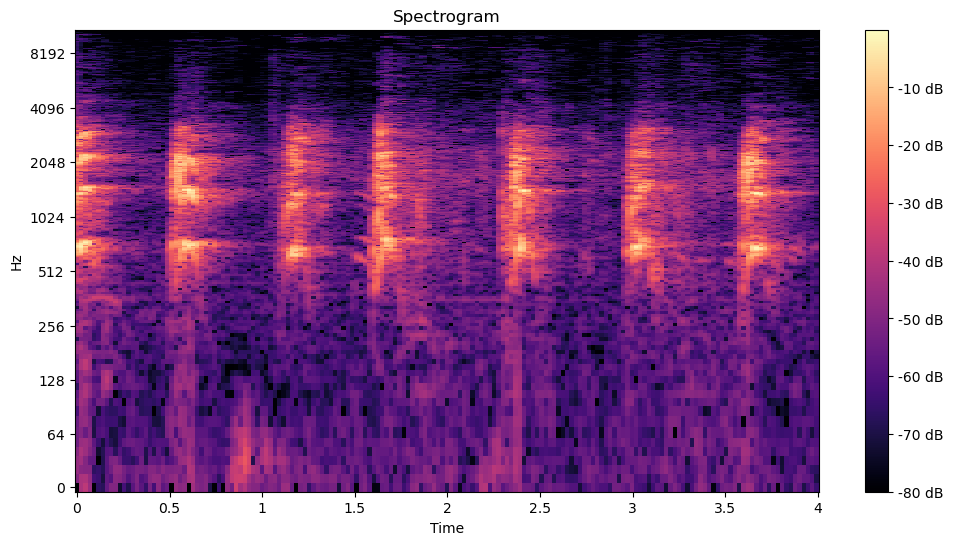

In [17]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram,sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [18]:
#The df we can see is name of the file and class is only useful column but name is not sufficient to get the features of audio
#we need to get the understand the music pattern and for that we are using MFCC which is used for features extraction
#lets try it for single audio file

mfccs=librosa.feature.mfcc(y=sample_sound,sr=sr,n_mfcc=40)
mfccs.shape

(40, 173)

In [19]:
import os
audio_dataset_path='UrbanSound8K/audio/'

In [20]:
#we need to create a feature extraction functions as we just need to apply mfcc to each audio data,
#now the input given into mfcc is librosa load file but librosa load file need the path to use librosa.load(file_path), 
#so we need to fetch file path also
def feature_extractor(path_finder):
    audio_file,sr=librosa.load(path_finder)
    mfcc_features=librosa.feature.mfcc(y=audio_file,sr=sr, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_scaled_features
    


In [21]:
Extracted_features=[]
for index,row in metadata.iterrows():
    path_finder=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    #print(type(path_finder))
    path_finder = path_finder.replace('\\', '/')
    #print(path_finder)
    class_name=row['class']
    X_Data=feature_extractor(path_finder)
    Extracted_features.append([X_Data,class_name])

C:\Users\rojin\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\rojin\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\rojin\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [22]:
extracted_features_df=pd.DataFrame(Extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690277,...",children_playing


In [23]:
Class_name_list=extracted_features_df['class'].unique().tolist()
Class_name_list

['dog_bark',
 'children_playing',
 'car_horn',
 'air_conditioner',
 'street_music',
 'gun_shot',
 'siren',
 'engine_idling',
 'jackhammer',
 'drilling']

In [24]:
name_list=sorted(Class_name_list)
print(name_list)

['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']


In [25]:
extracted_features_df['feature'].shape

(8732,)

In [26]:
#spliting the dataset into dependent and independentfeatures
X=np.array(extracted_features_df['feature'].tolist())
#y=np.array(extracted_features_df['class'].tolist())
y_old=np.array(extracted_features_df['class'].tolist())

In [27]:
#extracted_features_df['class'][500]
y_old

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
#label encoding for classes
y=pd.get_dummies(extracted_features_df['class'],columns=Class_name_list)
y=y.values

In [29]:
y[1381]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [30]:
 X.shape

(8732, 40)

In [31]:
y.shape

(8732, 10)

In [32]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
#Train test split from Sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.24484680e+02,  1.03169846e+02, -1.33165455e+01, ...,
         4.72908735e+00, -2.91925478e+00,  4.36318684e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017529e+00, -5.19278383e+00, -1.54999781e+00],
       [-4.03939552e+01, -1.31092958e+01, -7.20987606e+00, ...,
         1.99475384e+00, -8.70601475e-01,  2.89561915e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170380e+00, ...,
         9.74400163e-01,  5.15445411e-01,  9.15374756e-01],
       [-1.37251984e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008643e+00, -1.89575124e+00, -9.01497364e-01],
       [-4.18389374e+02,  2.06862335e+02,  7.23461771e+00, ...,
        -3.98612165e+00, -4.71784496e+00, -2.78926134e-01]], dtype=float32)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6985, 40)
(1747, 40)
(6985, 10)
(1747, 10)


In [36]:
#Model preparation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
class_size=y.shape[1]
model=Sequential()
#First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#2nd layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#3rd layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(class_size))
model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [39]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
#Model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
batch_size=32
start=datetime.now()

In [41]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
208/219 [===========================>..] - ETA: 0s - loss: 10.6372 - accuracy: 0.1205
Epoch 1: val_loss improved from inf to 2.29141, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 3s 6ms/step - loss: 10.2765 - accuracy: 0.1204 - val_loss: 2.2914 - val_accuracy: 0.1110
Epoch 2/100
211/219 [===========================>..] - ETA: 0s - loss: 2.5546 - accuracy: 0.1237
Epoch 2: val_loss improved from 2.29141 to 2.28085, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5511 - accuracy: 0.1241 - val_loss: 2.2808 - val_accuracy: 0.1099
Epoch 3/100
214/219 [============================>.] - ETA: 0s - loss: 2.3473 - accuracy: 0.1241
Epoch 3: val_loss improved from 2.28085 to 2.27267, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [========

219/219 [==============================] - 1s 4ms/step - loss: 1.6639 - accuracy: 0.4062 - val_loss: 1.5082 - val_accuracy: 0.5117
Epoch 24/100
213/219 [============================>.] - ETA: 0s - loss: 1.6211 - accuracy: 0.4277
Epoch 24: val_loss improved from 1.50820 to 1.39955, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.6189 - accuracy: 0.4286 - val_loss: 1.3995 - val_accuracy: 0.5495
Epoch 25/100
212/219 [============================>.] - ETA: 0s - loss: 1.5892 - accuracy: 0.4469
Epoch 25: val_loss improved from 1.39955 to 1.38843, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.5890 - accuracy: 0.4470 - val_loss: 1.3884 - val_accuracy: 0.5684
Epoch 26/100
219/219 [==============================] - ETA: 0s - loss: 1.5634 - accuracy: 0.4571
Epoch 26: val_loss impr

219/219 [==============================] - 1s 4ms/step - loss: 1.1585 - accuracy: 0.6046 - val_loss: 0.9417 - val_accuracy: 0.6943
Epoch 47/100
214/219 [============================>.] - ETA: 0s - loss: 1.1680 - accuracy: 0.6016
Epoch 47: val_loss improved from 0.94166 to 0.93948, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1677 - accuracy: 0.6011 - val_loss: 0.9395 - val_accuracy: 0.6898
Epoch 48/100
209/219 [===========================>..] - ETA: 0s - loss: 1.1346 - accuracy: 0.6096
Epoch 48: val_loss improved from 0.93948 to 0.93282, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1388 - accuracy: 0.6079 - val_loss: 0.9328 - val_accuracy: 0.6966
Epoch 49/100
219/219 [==============================] - ETA: 0s - loss: 1.1643 - accuracy: 0.6064
Epoch 49: val_loss impr

Epoch 72/100
212/219 [============================>.] - ETA: 0s - loss: 1.0228 - accuracy: 0.6567
Epoch 72: val_loss improved from 0.81623 to 0.81211, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0213 - accuracy: 0.6573 - val_loss: 0.8121 - val_accuracy: 0.7390
Epoch 73/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0479 - accuracy: 0.6542
Epoch 73: val_loss improved from 0.81211 to 0.80863, saving model to E:/Personal_use/Personal_Projects/Audio_Classification\Checkpoint_file.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0453 - accuracy: 0.6544 - val_loss: 0.8086 - val_accuracy: 0.7470
Epoch 74/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0345 - accuracy: 0.6545
Epoch 74: val_loss did not improve from 0.80863
219/219 [==============================] - 1s 4ms/step - loss: 1.0339 - accuracy: 0.6534 - val_loss: 0.808

Epoch 98/100
219/219 [==============================] - ETA: 0s - loss: 0.9684 - accuracy: 0.6710
Epoch 98: val_loss did not improve from 0.74532
219/219 [==============================] - 1s 4ms/step - loss: 0.9684 - accuracy: 0.6710 - val_loss: 0.7804 - val_accuracy: 0.7693
Epoch 99/100
215/219 [============================>.] - ETA: 0s - loss: 0.9671 - accuracy: 0.6770
Epoch 99: val_loss did not improve from 0.74532
219/219 [==============================] - 1s 4ms/step - loss: 0.9711 - accuracy: 0.6762 - val_loss: 0.7548 - val_accuracy: 0.7562
Epoch 100/100
214/219 [============================>.] - ETA: 0s - loss: 0.9793 - accuracy: 0.6672
Epoch 100: val_loss did not improve from 0.74532
219/219 [==============================] - 1s 4ms/step - loss: 0.9770 - accuracy: 0.6677 - val_loss: 0.7677 - val_accuracy: 0.7499
Training completed in time:  0:01:38.254084


In [42]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7498568892478943


In [43]:
from IPython.display import Audio
filename="E:/Personal_use/Personal_Projects/Audio_Classification/UrbanSound8K/audio/fold3/12647-3-0-0.wav"
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
audio_data,sr=librosa.load(filename)
Audio(data=audio_data,rate=sr)

In [44]:
prediction_feature

array([[-3.9372977e+02,  1.7198911e+02,  1.0095128e+01,  5.8744669e+00,
         2.0668130e+00,  9.1558027e+00, -2.3875711e+00,  1.9095056e+00,
        -5.7554722e+00, -2.5428537e-01,  2.0889523e+00,  1.1597796e+01,
         2.7157316e+00,  2.4051514e+00,  4.3274932e+00,  5.3615131e+00,
        -5.8241501e+00,  7.9907227e-01,  8.3930473e+00,  1.2495083e+01,
         2.4704523e+00,  3.3570797e+00, -8.6057061e-01,  2.5363128e+00,
         3.3320580e+00,  6.1643944e+00,  9.2196906e-01,  4.0250998e+00,
         2.0109291e+00,  4.6702299e+00, -1.6123552e+00, -5.1378024e-01,
        -4.2926626e+00, -9.9426121e-02,  1.6602613e+00,  4.1492190e+00,
         9.0762538e-01,  6.2297225e+00,  4.0630002e+00,  2.9997466e+00]],
      dtype=float32)

In [45]:
prediction_probabilities = model.predict(prediction_feature)
predicted_class = prediction_probabilities.argmax(axis=-1)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 147ms/step
Predicted class: [3]


In [46]:
print(prediction_probabilities)

[[0.02159278 0.01001062 0.12106955 0.46099937 0.0526533  0.01732902
  0.10021226 0.00071355 0.03230148 0.18311808]]


In [47]:
predicted_class[0]

3

In [48]:
print(name_list[predicted_class[0]])

dog_bark


# Saving the model object and preprocessor object
As preprocessing is required on original audio data direct sending it to save model is not just enough, pickle file should have both model object as well as preprocessor object 

In [50]:
def Pickle_feature_extractor(path_finder):
    audio_file,sr=librosa.load(path_finder)
    mfcc_features=librosa.feature.mfcc(y=audio_file,sr=sr, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T,axis=0)
    mfcc_scaled_features=mfcc_scaled_features.reshape(1,-1)
    return mfcc_scaled_features

In [56]:
import pickle
data={'model':model,'preprocessing': Pickle_feature_extractor}
with open("saved_steps.pkl",'wb') as file:
    pickle.dump(data,file)

In [57]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
model=data['model']
preprocessor_func=data['preprocessing']

In [58]:
preprocessed_data=preprocessor_func(filename)

In [60]:
y_predict=model.predict(preprocessed_data)


1/1 [==============================] - 0s 68ms/step


In [66]:
name_list[y_predict.argmax()]

'dog_bark'

# For streamlit webapp

In [68]:
from keras.models import load_model
model.save('streamlit_model.h5')

In [82]:
modelst=load_model('streamlit_model.h5')
joblib.dump((Pickle_feature_extractor), 'preprocessor.joblib')

['preprocessor.joblib']

In [79]:
preprocessed_data=preprocessing(filename)
y_predict=modelst.predict(preprocessed_data)
name_list[y_predict.argmax()]

1/1 [==============================] - 0s 84ms/step


'dog_bark'